In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

In [2]:
def get_EZ(element, E1, E2):
    comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
    energies = []
    for i in range(len(comps)):
        if element == comps[i][0] and element == comps[i][1]:
            energies.append((E1[i]+E2[i])/2)
        elif element == comps[i][0]:
            energies.append(E1[i])
        elif element == comps[i][1]:
            energies.append(E2[i])
    return(np.array(energies))   

In [3]:
datadict = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/atomic_energies.csv')
datadict = datadict.to_dict()

In [ ]:
#datadict

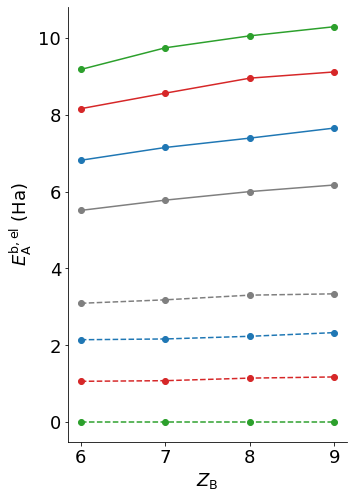

In [15]:
energies_Z = []
for el in ['C', 'N', 'O', 'F']:
    energies_Z.append(-get_EZ(el, datadict['Eb_homo_Z1'], datadict['Eb_homo_Z2']))
    
energies_ZH = []
for el in ['C', 'N', 'O', 'F']:
    energies_ZH.append(-get_EZ(el, datadict['Eb_homo_Z1_H'], datadict['Eb_homo_Z2_H']))

color = ['gray', 'blue', 'red', 'green']

num_H = [3,2,1,1]
ZB = [6,7,8,9]
plt.rcParams["figure.figsize"] = [5,8]
plt.rcParams['font.size'] = 18

fig, ax = plt.subplots(1,1)

for i in range(len(energies_Z)):
    ax.plot(ZB, energies_Z[i], '-o', color = f'tab:{color[i]}')
    ax.plot(ZB, energies_ZH[i], '--o', color = f'tab:{color[i]}')
ax.set_xticks(ZB)
ax.set_xlabel(r'$Z_{\rm{B}}$')
ax.set_ylabel(r'$E_{\rm{A}}^{\rm{b, el}}$ (Ha)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('/home/sahre/work/bonding_trends/figures/results/alchemical_bde.svg')

In [9]:
def ewald(lval):
    a = 20
    s = pymatgen.core.structure.Structure(
        [[a, 0, 0], [0, a, 0], [0, 0, a]],
        species="C O".split(),
        coords=[[10, 0, 0], [11.12, 0, 0]],
        charge=0,
        coords_are_cartesian=True,
        site_properties={"charge": [7 - lval, 7 + lval]},
    )
    e = pymatgen.analysis.ewald.EwaldSummation(s)
    return e.total_energy  # eV

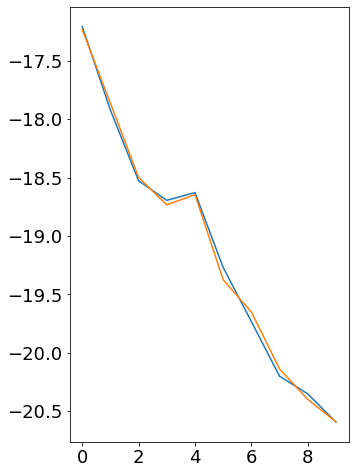

In [10]:
# plot energies heavy, H
atomic_energies = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/atomic_energies.csv')

# linear fit through heavy H
# r2, MAE

# coupled fits
e_ele_AB = np.array(atomic_energies['Eb_homo_Z1']) + np.array(atomic_energies['Eb_homo_Z2']) + np.array(atomic_energies['Eb_homo_Z1_H']) + np.array(atomic_energies['Eb_homo_Z2_H'])
bt_data = {'bfe':e_ele_AB, 'nbfe':np.zeros(len(e_ele_AB)), 'unit':1, 'Z1':np.array(atomic_energies['Z1']), 'Z2':np.array(atomic_energies['Z2']), 'bfe type':'homo'}

b_atomic = bt.BDE_clean.fromdict(bt_data)
b_atomic.linear_fit()

plt.plot(b_atomic.bfe)
plt.plot(b_atomic.bfe_fitted)

In [11]:
energies_ZandH = []
for i in range(len(energies_Z)):
    energies_ZandH.append(energies_Z[i] + energies_ZH[i])

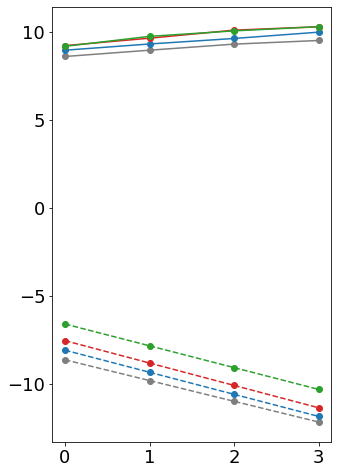

In [12]:
fits = []
i_ic = 0
i_s = 4
for i in range(4):
    fit = b_atomic.linear_params[i_ic+i] + b_atomic.linear_params[i_s+i]*np.array([6,7,8,9])
    fits.append(fit)

for i in range(len(energies_ZandH)):
    plt.plot(energies_ZandH[i], '-o', color = f'tab:{color[i]}')
    plt.plot(fits[i], '--o', color = f'tab:{color[i]}')

In [8]:
comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']

energies = dict()
for c in comps:
    path = f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/diatomics/{c}/atomic_energies.txt'
    energies[c] = np.loadtxt(path)

In [9]:
cx = ['CC', 'CN', 'CO', 'CF']
c_energies = []
for c in cx:
    c_energies.append(energies[c][:,-1][0])
    
nx = ['CN', 'NN', 'NO', 'NF']
n_energies = []
for i, c in enumerate(nx):
    if i == 0:
        n_energies.append(energies[c][:,-1][1])
    else:
        n_energies.append(energies[c][:,-1][0])
        
ox = ['CO', 'NO', 'OO', 'OF']
o_energies = []
for i, c in enumerate(ox):
    if i < 2:
        o_energies.append(energies[c][:,-1][1])
    else:
        o_energies.append(energies[c][:,-1][0])
        
fx = ['CF', 'NF', 'OF', 'FF']
f_energies = []
for i, c in enumerate(fx):
    if i < 3:
        f_energies.append(energies[c][:,-1][1])
    else:
        f_energies.append(energies[c][:,-1][0])
    
z = np.array([6,7,8,9])

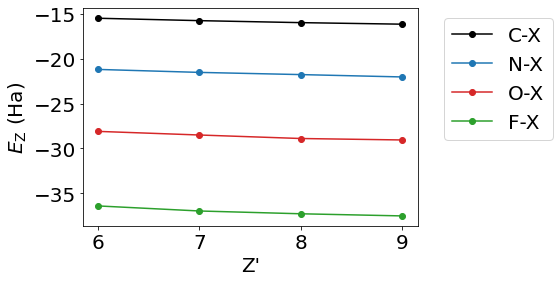

In [10]:
plt.rcParams['font.size'] = 20
plt.plot(z, c_energies, '-o', color='black', label = 'C-X')
plt.plot(z, n_energies, '-o', color='tab:blue', label = 'N-X')
plt.plot(z, o_energies, '-o', color='tab:red', label = 'O-X')
plt.plot(z, f_energies, '-o', color='tab:green', label = 'F-X')
plt.xlabel('Z\'' )
plt.ylabel(r'$E_{\rm{Z}}$ (Ha)')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [ ]:
from scipy.stats import linregress
yx_en = np.array([c_energies, n_energies, o_energies, f_energies])
r2 = []
lf = []
slope = []
intercept = []
for yx in yx_en:
    res = linregress(z, yx)
    lf.append(res)
    r2.append(res[2]**2)
    slope.append(res[0])
    intercept.append(res[1])

In [ ]:
linregress(z, yx)

### Why is atomic energy positive for F?

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import alchemy_tools2 as at
from parse_density_files import CUBE

In [ ]:
cube = CUBE(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/FF/cube-files/ve_07.cube')
density = cube.data_scaled
    
grid = cube.get_grid()
hmatrix = cube.get_hmatrix()
nuclei = cube.atoms

out = at.calculate_atomic_energies(density, nuclei, grid, hmatrix, intg_method = 'sum')

In [ ]:
out

In [ ]:
def get_alchpot(cube_path, ueg=False):
    cube = CUBE(cube_path)
    if ueg:
        num_elec = int(np.round(cube.data_scaled.sum()))
        shape = cube.data_scaled.shape
        density = np.full(shape=shape, fill_value=num_elec/(shape[0]*shape[1]*shape[2]))
    else:
        
        density = cube.data_scaled
    
    grid = cube.get_grid()
    hmatrix = cube.get_hmatrix()
    nuclei = cube.atoms

    out = at.calculate_atomic_energies(density, nuclei, grid, hmatrix, intg_method = 'sum')
    return(out[2][0])

from scipy.special import erf

def get_Vloc(r, r_loc, c, Z_ion):
    part1 = -Z_ion/r*erf(r/(np.sqrt(2)*r_loc))
    part2 = np.exp(-0.5*np.power(r/r_loc, 2))*(c[0] + c[1]*np.power(r/r_loc, 2))
    return(part1 + part2)

In [ ]:
files = ['ve_00.cube', 've_01b.cube', 've_03b.cube', 've_06b.cube', 've_07b.cube']
alchpot_Fb = []
for f in files:
    if f == 've_00.cube':
        alchpot_Fb.append(get_alchpot(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/FF/cube-files/ve_07b.cube', ueg=True))
    else:
        alchpot_Fb.append(get_alchpot(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/FF/cube-files/{f}'))

In [ ]:
files = ['ve_00.cube', 've_01.cube', 've_03.cube', 've_04.cube', 've_06.cube', 've_07.cube']

alchpot_O = []
for f in files:
    if f == 've_00.cube':
        alchpot_O.append(get_alchpot(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/OO/cube-files/ve_07.cube', ueg=True))
    else:
        alchpot_O.append(get_alchpot(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/OO/cube-files/{f}'))

In [ ]:
files = ['ve_00.cube', 've_06.cube', 've_08.cube', 've_11.cube', 've_14.cube']



In [ ]:
alchpot_Fb
7*np.trapz(y=alchpot_Fb, x=lam_val_F)

In [ ]:
lam_val_F = np.array([0,1,3,6,7])/7

lam_val = np.array([0,1,3,4,6,7])/7

plt.plot(lam_val_F, np.array(alchpot_Fb), '-o')
plt.plot(lam_val, np.array(alchpot_O), '-o')

In [ ]:
### try local form of pp

In [ ]:
files = ['ve_00.cube', 've_01.cube', 've_03.cube', 've_04.cube', 've_06.cube', 've_07.cube']

pp_F = []
for f in files:
    if f == 've_00.cube':
        cube = CUBE(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/FF/cube-files/ve_07.cube')
        density = np.full(shape=(100,100,100), fill_value=7*1e-6)
    else:
        cube = CUBE(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/FF/cube-files/{f}')
        density = cube.data_scaled
    
    grid = cube.get_grid()
    hmatrix = cube.get_hmatrix()
    nuclei = cube.atoms

    r_loc = 0.214929587
    c1 = -21.573028360
    c2 = 3.199776151
    Z_ion = 7

    distance_nuc_grid = at.distance_MIC2(nuclei[0][1:4], grid, hmatrix)
    Vloc = get_Vloc(distance_nuc_grid, r_loc, [c1, c2], Z_ion)
    atomic_energy = (density*Vloc).sum()

    pp_F.append(atomic_energy)

### make database

In [24]:
import glob
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import pysmiles as ps
import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm

In [25]:
comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']

energies = dict()
for c in comps:
    path = f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/diatomics/{c}/atomic_energies.txt'
    energies[c] = np.loadtxt(path)

In [26]:
datadict = {'smiles':[], 'Z1':[], 'Z2':[], 'E_Z1':[], 'E_Z2':[], 'E_Z1_H':[], 'E_Z2_H':[],
 'Eb_homo_Z1':[], 'Eb_homo_Z2':[], 'Eb_homo_Z1_H':[], 'Eb_homo_Z2_H':[]}

smiles = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
datadict['smiles'] = smiles

for s in smiles:
    path = f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/diatomics/{s}/atomic_energies.txt'
    energies[s] = np.loadtxt(path)
    
    # add charge
    datadict['Z1'].append(energies[s][0,0])
    datadict['Z2'].append(energies[s][1,0])
    
    # add energy heavy atoms
    E1_dia = energies[s][0,-1]
    datadict['E_Z1'].append(E1_dia)
    E2_dia = energies[s][1,-1]
    datadict['E_Z2'].append(E2_dia)
    
    # add energy hydrogens
    graph = ps.read_smiles(s)
    h1, h2 = graph.nodes.data('hcount')[0], graph.nodes.data('hcount')[1]
    
    all_energies = energies[s][:,-1]
    E1_dia_H = all_energies[2:2+h1].sum()
    E2_dia_H = all_energies[2+h1:].sum()
    
    datadict['E_Z1_H'].append(E1_dia_H)
    datadict['E_Z2_H'].append(E2_dia_H)
    
    # calculate atomic binding energy homolytic
    frag1 = np.loadtxt(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/{2*s[0]}/atomic_energies_rad_frag.txt')
    frag2 = np.loadtxt(f'/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/radical_frags/{2*s[1]}/atomic_energies_rad_frag.txt')
    
    # heavy atoms
    try:
        E1_frag = frag1[0, -1]
    except IndexError:
        E1_frag = frag1[-1]
    try:
        E2_frag = frag2[0, -1]
    except IndexError:
        E2_frag = frag2[-1]
    
    Eb_homo_Z1 = E1_dia - E1_frag
    Eb_homo_Z2 = E2_dia - E2_frag
    
    datadict['Eb_homo_Z1'].append(Eb_homo_Z1)
    datadict['Eb_homo_Z2'].append(Eb_homo_Z2)
    
    # hydrogens
    try:
        E1_H_frag = frag1[1:,-1].sum()
    except IndexError:
        E1_H_frag = 0
    try:
        E2_H_frag = frag2[1:,-1].sum()
    except IndexError:
        E2_H_frag = 0
        
    Eb_homo_Z1_H = E1_dia_H - E1_H_frag
    Eb_homo_Z2_H = E2_dia_H - E2_H_frag
    
    datadict['Eb_homo_Z1_H'].append(Eb_homo_Z1_H)
    datadict['Eb_homo_Z2_H'].append(Eb_homo_Z2_H)
    

In [27]:
df = pd.DataFrame(datadict)
df.to_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/alchemy/atomic_energies.csv', index=False)

In [28]:
### how do trends look like compare to DFT results

In [29]:
def get_EZ(element, E1, E2):
    comps = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
    energies = []
    for i in range(len(comps)):
        if element == comps[i][0] and element == comps[i][1]:
            energies.append((E1[i]+E2[i])/2)
        elif element == comps[i][0]:
            energies.append(E1[i])
        elif element == comps[i][1]:
            energies.append(E2[i])
    return(np.array(energies))    

In [30]:
energies_Z = []
for el in ['C', 'N', 'O', 'F']:
    energies_Z.append(get_EZ(el, datadict['Eb_homo_Z1'], datadict['Eb_homo_Z2']))
    
energies_ZH = []
for el in ['C', 'N', 'O', 'F']:
    energies_ZH.append(get_EZ(el, datadict['Eb_homo_Z1_H'], datadict['Eb_homo_Z2_H']))

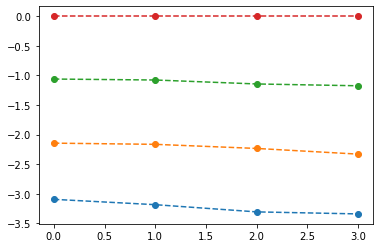

In [31]:
for e, eh in zip(energies_Z, energies_ZH):
    #plt.plot(e, '-o')
    plt.plot(eh, '--o')

In [32]:

# calculate electronic binding energies
e_ele_AB = np.array(datadict['Eb_homo_Z1']) + np.array(datadict['Eb_homo_Z2']) + np.array(datadict['Eb_homo_Z1_H']) + np.array(datadict['Eb_homo_Z2_H'])

# nbfe with exact distance and hydrogen
def get_nuc_rep(xyz_file):
    atoms = aio.read(xyz_file)
    nuc_rep = 0
    for i in range(len(atoms)):
        for j in range(i+1, len(atoms)):
            nuc_rep += atoms.get_atomic_numbers()[i]*atoms.get_atomic_numbers()[j]/atoms.get_distance(i, j)*Bohr
    return(nuc_rep)

# calculate nuc rep
import ase.io as aio
from ase.units import Bohr
def key2(x):
    pattern_list = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
    for i, p in enumerate(pattern_list):
        if p in x:
            return(i)
row = 'row_2'
system = 'diatomics'
bond_type = 'single'
fname = '*_opt.xyz'

frag_nrep = {'C':0, 'N':0, 'O':0, 'F':0}
for k in frag_nrep.keys():
    path = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/fragments_single/{k}{k}_opt.xyz'
    frag_nrep[k] = get_nuc_rep(path)

structures = glob.glob(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/{fname}')
structures.sort(key=key2)
nrep = []
for s in structures:
    e_rep = get_nuc_rep(s)
    smiles = s.split('/')[-1].split('_')[0]
    frag1, frag2 = uqm.fragmentize_smiles(smiles)
    nrep.append(e_rep - frag_nrep[frag1] - frag_nrep[frag2])
nrep = np.array(nrep)
# load data
energies_dh = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_single.txt')
energies_dh[:,1] = energies_dh[:,0] - nrep
energies_dh[:,2] = nrep

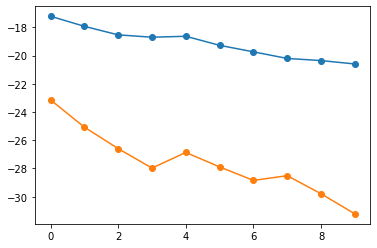

In [33]:
plt.plot(e_ele_AB, '-o')
plt.plot(energies_dh[:,1], '-o')